In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [2]:
n = 250

df = pd.DataFrame({
    "date": pd.date_range(start="2024-01-01", periods=n, freq="B"),
    "open_price": np.random.uniform(100, 200, n),
    "close_price": np.random.uniform(100, 200, n),
    "volume": np.random.randint(1_000_000, 5_000_000, n)
})

df.head()

,date,open_price,close_price,volume
0,2024-01-01,137.454012,129.444889,4848693
1,2024-01-02,195.071431,138.509773,1383934
2,2024-01-03,173.199394,185.113667,3004168
3,2024-01-04,159.865848,131.692201,1317428
4,2024-01-05,115.601864,116.949275,2367763


In [4]:
df["rolling_volatility"] = (
    df["daily_return"]
    .rolling(window=20)
    .std()
)

df[["date", "rolling_volatility"]].head(25)


,date,rolling_volatility
0,2024-01-01,NaN
1,2024-01-02,NaN
2,2024-01-03,NaN
3,2024-01-04,NaN
4,2024-01-05,NaN
5,2024-01-08,NaN
6,2024-01-09,NaN
7,2024-01-10,NaN
8,2024-01-11,NaN
9,2024-01-12,NaN


In [5]:
mean_return = df["daily_return"].mean()
std_return = df["daily_return"].std()

future_days = 30

simulated_returns = np.random.normal(
    mean_return,
    std_return,
    future_days
)

last_price = df["close_price"].iloc[-1]

future_prices = last_price * np.cumprod(1 + simulated_returns)

future_prices


array([302.14085664,  91.35223339,  73.6691873 ,  57.28782396,
        57.13756105,  59.42157422,  43.35684195,  37.03705965,
        30.29059234,  28.6911163 ,  32.17500666,  42.90289152,
        59.10948655,  74.16767659,  58.36966717,  61.49818345,
       109.56694147, 149.58716279, 137.57901191, 211.73805703,
       198.14033876, 168.40786963, 249.57737414, 163.12177041,
        76.44007912, 102.64599718, 109.12157588, 119.33611242,
       112.64608256, 110.57122008])

In [6]:
risk_metrics = {
    "mean_return": np.mean(df["daily_return"]),
    "volatility": np.std(df["daily_return"]),
    "min_return": np.min(df["daily_return"]),
    "max_return": np.max(df["daily_return"]),
    "value_at_risk_95": np.percentile(df["daily_return"], 5)
}

risk_metrics


{'mean_return': np.float64(0.054607536361135106),
 'volatility': np.float64(0.3055877047041987),
 'min_return': np.float64(-0.4660388254744623),
 'max_return': np.float64(0.8620712031621316),
 'value_at_risk_95': np.float64(-0.40137995288874984)}

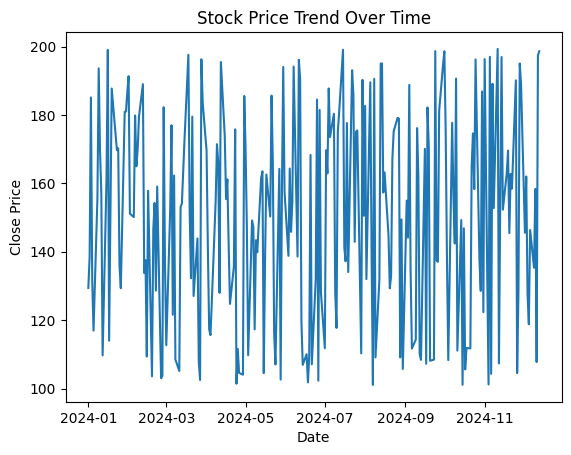

In [7]:
plt.plot(df["date"], df["close_price"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Trend Over Time")
plt.show()


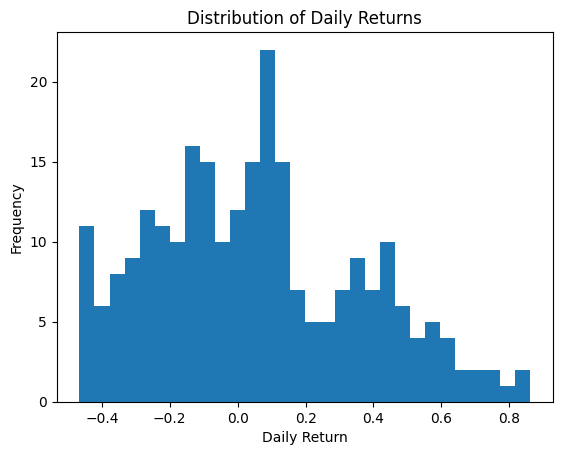

In [8]:
plt.hist(df["daily_return"], bins=30)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()
